### About Dataset
This data set from the USGS (U.S. Geological Survey) includes 1-month earthquake data that occurred on April 17 and May 17 2023.  
And in this study, **Exploratory Data Analysis (EDA)** was performed on earthquake data.

### Import Libraries and Upload Data

In [1]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [2]:
# Load Data
eq = pd.read_csv("all_month.csv")

### Understand Data

In [3]:
# Display Data
eq.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-05-17T02:43:04.840Z,38.820999,-122.789665,1.65,1.08,md,11.0,79.0,0.010440,0.04,...,2023-05-17T02:44:41.581Z,"6km NNW of The Geysers, CA",earthquake,0.48,1.21,0.270,11.0,automatic,nc,nc
1,2023-05-17T02:38:21.865Z,60.914200,-151.285900,57.40,1.50,ml,NaN,NaN,NaN,0.37,...,2023-05-17T02:40:33.135Z,"18 km SSW of Tyonek, Alaska",earthquake,NaN,0.70,NaN,NaN,automatic,ak,ak
2,2023-05-17T02:32:24.160Z,38.832333,-122.792168,1.83,0.65,md,9.0,79.0,0.006232,0.01,...,2023-05-17T02:45:10.476Z,"6km W of Cobb, CA",earthquake,0.40,1.15,0.080,9.0,automatic,nc,nc
3,2023-05-17T02:30:43.450Z,19.197166,-155.466827,29.92,1.98,md,35.0,100.0,NaN,0.13,...,2023-05-17T02:33:56.690Z,"1 km ESE of Pāhala, Hawaii",earthquake,0.55,0.89,0.150,5.0,automatic,hv,hv
4,2023-05-17T02:22:55.690Z,33.019000,-117.074500,12.20,1.05,ml,9.0,231.0,0.231000,0.34,...,2023-05-17T02:26:26.254Z,"7km NNW of Poway, CA",earthquake,5.09,31.61,0.119,9.0,automatic,ci,ci


#### Brief About the Earthquake Event Terms/Variables:

- ***time:*** Time when the event occurred. Times are reported in milliseconds since the epoch ( 1970-01-01T00:00:00.000Z), and do not include leap seconds. In certain output formats, the date is formatted for readability.  
- ***latitude:*** Decimal degrees latitude. Negative values for southern latitudes.
- ***longitude:*** Decimal degrees longitude. Negative values for western longitudes.
- **depth:** Depth of the event in kilometers. The depth where the earthquake begins to rupture. This depth may be relative to the WGS84 geoid, mean sea-level, or the average elevation of the seismic stations which provided arrival-time data for the earthquake location.
- ***mag:*** The magnitude for the event. Earthquake magnitude is a measure of the size of an earthquake at its source.
- ***magType:*** The method or algorithm used to calculate the preferred magnitude for the event.
- ***nst:*** The total number of seismic stations used to determine earthquake location.
- ***gap:*** The largest azimuthal gap between azimuthally adjacent stations (in degrees). In general, the smaller this number, the more reliable is the calculated horizontal position of the earthquake. Earthquake locations in which the azimuthal gap exceeds 180 degrees typically have large location and depth uncertainties.
- ***dmin:*** Horizontal distance from the epicenter to the nearest station (in degrees). 1 degree is approximately 111.2 kilometers. In general, the smaller this number, the more reliable is the calculated depth of the earthquake.
- ***rms:*** The root-mean-square (RMS) travel time residual, in sec, using all weights. This parameter provides a measure of the fit of the observed arrival times to the predicted arrival times for this location. Smaller numbers reflect a better fit of the data.
- ***net:*** The ID of a data contributor. Identifies the network considered to be the preferred source of information for this event.
- ***id:*** A unique identifier for the event. This is the current preferred id for the event, and may change over time.
- ***updated:*** Time when the event was most recently updated. Times are reported in milliseconds since the epoch.
- ***place:*** Textual description of named geographic region near to the event. This may be a city name, or a Flinn-Engdahl Region name. If there is no nearby city within 300 kilometers (or if the nearby cities database is unavailable for some reason), the Flinn-Engdahl (F-E) seismic and geographical regionalization scheme is used.
- ***type:*** Type of seismic event.
- ***horizontalError:*** Uncertainty of reported location of the event in kilometers.
- ***depthError:*** Uncertainty of reported depth of the event in kilometers.
- ***magError:*** Uncertainty of reported magnitude of the event.
- ***magNst:*** The total number of seismic stations used to calculate the magnitude for this earthquake.
- ***status:*** Indicates whether the event has been reviewed by a human. Status is either automatic or reviewed. Automatic events are directly posted by automatic processing systems and have not been verified or altered by a human. Reviewed events have been looked at by a human. The level of review can range from a quick validity check to a careful reanalysis of the event.
- ***locationSource:*** The network that originally authored the reported location of this event.
- ***magSource:*** Network that originally authored the reported magnitude for this event.

In [4]:
# Display Data Information
eq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11544 entries, 0 to 11543
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             11544 non-null  object 
 1   latitude         11544 non-null  float64
 2   longitude        11544 non-null  float64
 3   depth            11544 non-null  float64
 4   mag              11544 non-null  float64
 5   magType          11544 non-null  object 
 6   nst              8310 non-null   float64
 7   gap              8310 non-null   float64
 8   dmin             6157 non-null   float64
 9   rms              11544 non-null  float64
 10  net              11544 non-null  object 
 11  id               11544 non-null  object 
 12  updated          11544 non-null  object 
 13  place            11544 non-null  object 
 14  type             11544 non-null  object 
 15  horizontalError  7632 non-null   float64
 16  depthError       11544 non-null  float64
 17  magError    

- There are 11.544 entries which is the number of earthquakes that occurred in 1 month !
- We have 22 features (10 object, 12 float)
- There is NULL values.  

In [5]:
# Display Data Description
eq.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,11544.000000,11544.000000,11544.000000,11544.000000,8310.000000,8310.000000,6157.000000,11544.000000,7632.000000,11544.000000,8280.000000,8302.00000
mean,41.976044,-121.109846,24.290589,1.524903,22.796390,119.804504,0.536388,0.305527,1.530766,1.996206,0.251469,16.67032
std,18.954389,62.752711,53.430475,1.204252,21.436406,63.159766,1.890101,0.274331,2.881653,5.408441,0.381746,27.20788
min,-61.685700,-179.987900,-3.200000,-1.370000,2.000000,11.000000,0.000000,0.000000,0.080000,0.000000,0.000000,0.00000
25%,33.653750,-154.966000,2.640000,0.800000,8.000000,69.462500,0.022150,0.100000,0.270000,0.400000,0.114000,5.00000
50%,39.195083,-122.899000,8.010000,1.320000,17.000000,106.000000,0.064480,0.190000,0.430000,0.700000,0.172000,10.00000
75%,58.260833,-116.637333,19.805000,2.000000,30.000000,158.000000,0.191300,0.490000,0.811007,1.400000,0.247207,18.00000
max,86.249600,179.927100,649.160000,7.600000,258.000000,355.000000,38.036000,1.650000,37.090000,313.600000,5.350000,677.00000


### What was the magnitude range in which earthquakes occurred?
We can see the magnitude of earthquakes varies between -1.37 to 7.60, the mean magnitude is low (1.52) which means majority of the earthquakes are low magnitude (we dont even feel them).

---
#### Duplicate Values

In [6]:
# Remove Duplicate Rows
print("Duplicate Data Sum: ", eq.duplicated().sum())
if eq.duplicated().sum() != 0:
    print("Before Removing Duplicates:", eq.shape[0]) 
    eq.drop_duplicates()
    print("After Removing Duplicates:", eq.shape[0]) 

Duplicate Data Sum:  0


---
#### Nunique & Unique Values

In [7]:
# Explore Nunique Values
column_names = list(eq.columns)
for col_name in column_names:
    print(col_name, ":", eq[col_name].nunique())

time : 11543
latitude : 10073
longitude : 10379
depth : 4092
mag : 593
magType : 11
nst : 156
gap : 725
dmin : 5046
rms : 556
net : 15
id : 11544
updated : 11544
place : 6035
type : 6
horizontalError : 1181
depthError : 1753
magError : 3163
magNst : 184
status : 2
locationSource : 15
magSource : 16


In [111]:
# Explore Unique Values
cols = ["type", "status"]

for col in cols: 
    if isinstance(col, str):
        print(f"{col}:", eq[col].unique())

type: ['earthquake' 'quarry blast' 'explosion' 'other event' 'ice quake'
 'chemical explosion']
status: ['automatic' 'reviewed']


---
#### Null Values

In [9]:
# Check Null Values
eq.isnull().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                3234
gap                3234
dmin               5387
rms                   0
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    3912
depthError            0
magError           3264
magNst             3242
status                0
locationSource        0
magSource             0
dtype: int64

Null values can be kept because they are not in the columns to be analyzed.

---
## Exploratory Data Analysis and Conclusions
### What was the number of countries with seismic events worldwide?

Actually, this question can only be answered with clearer data, because if we look at the description of the "place" feature, we see that it can be a city name or Flinn-Engdahl Region name.  
In other words, the result that we will get will not be fully accurate, since only the name of the city or region is written instead of the country name in some of the "place" data.  
Still, out of curiosity, I wanted to see the result.

In [10]:
# Creating a "country" Column from Place Column
eq["country"] = eq["place"].str.rsplit(",").str[-1] 

# Number of Countries with Seismic Events Worldwide
print("Number of countries with seismic events worldwide:", eq["country"].nunique())

Number of countries with seismic events worldwide: 214


As I expected, we got such a high number because some of the "place" data does not have a country name.

---
### Where did earthquakes occur most frequently?

In [11]:
eq["place"].value_counts().head()

place
Alaska Peninsula               167
7km NW of The Geysers, CA      137
84 km NW of Karluk, Alaska     133
85 km NW of Karluk, Alaska     120
85 km NNW of Karluk, Alaska    118
Name: count, dtype: int64

The most frequently earthquake-prone location is Alaska.  
This doesn't mean that Alaska is a dangerous earthquake zone, it is necessary to look at the magnitude of the earthquakes that occur.

#### Chart of the 10 most common places where earthquakes occur

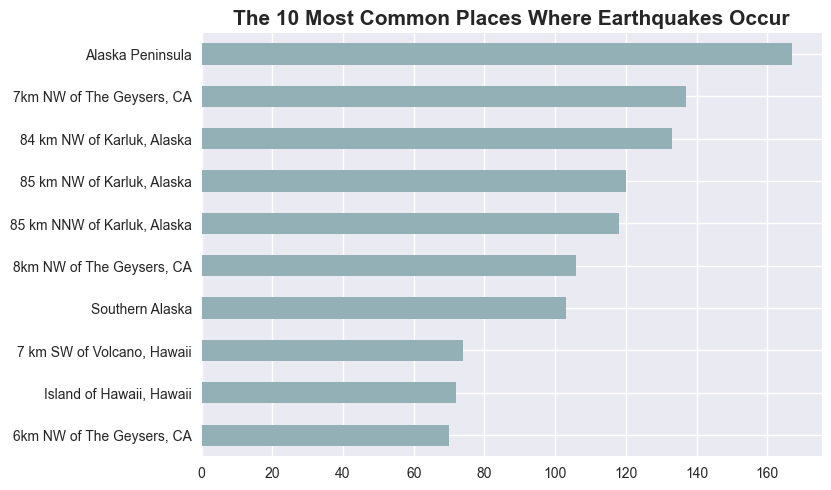

In [109]:
# Chart of the 10 Most Common Places Where Earthquakes Occur
pd.Series(eq["place"]).value_counts()[:10].sort_values().plot(kind="barh", color="#94B0B7")
plt.title("The 10 Most Common Places Where Earthquakes Occur", fontsize=15, fontweight="bold")
plt.ylabel(None)
#plt.yticks(fontweight="semibold")
plt.show()

---
### Where was the locations where the earthquake magnitude is 6 or higher?

In [13]:
# Locations Where Earthquake Magnitude is 6 and Higher
mag = eq.query("mag >= 6")
mag_data = mag["place"].value_counts()
mag_data

place
south of the Fiji Islands                  3
95 km WNW of Hihifo, Tonga                 1
near the west coast of Honshu, Japan       1
171 km SSE of Teluk Dalam, Indonesia       1
Kermadec Islands, New Zealand              1
Banda Sea                                  1
30 km NNE of Kandrian, Papua New Guinea    1
Name: count, dtype: int64

Although Alaska is the region where earthquakes are most common, devastating earthquakes do not occur in this region.  
Places to be especially careful about, especially Fiji Islands, Tonga, Japan, Indonesia, New Zealand, Banda Sea, Papua New Guinea.

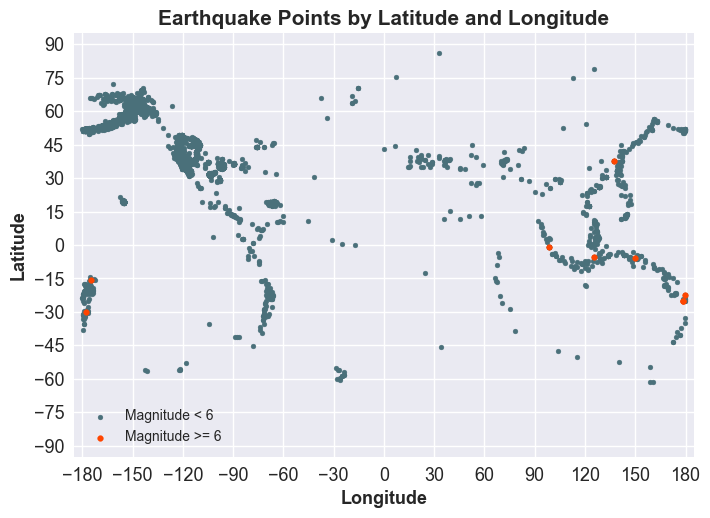

In [63]:
# Plot the Data
plt.style.use("seaborn-v0_8")
fig, ax = plt.subplots()
ax.scatter(eq["longitude"], eq["latitude"], s=12, color="#4A707A")
ax.scatter(mag["longitude"], mag["latitude"], s=17, color="orangered")

# Set Parameter and Axis Values
ax.set_xticks(np.arange(-180,190,30))   # Longitude (-180, 180)
ax.set_yticks(np.arange(-90,100,15))    # Latitude  (-90, 90)
ax.axis([-185, 185, -95, 95])

# Set Titles and Legent
ax.set_title("Earthquake Points by Latitude and Longitude", fontsize=15, fontweight="bold")
ax.set_ylabel("Latitude", fontsize=13, fontweight="bold")
ax.set_xlabel("Longitude", fontsize=13, fontweight="bold")
ax.tick_params(axis="both", labelsize=13) #Eksenlerdeki sayıların boyutu
plt.legend(["Magnitude < 6", "Magnitude >= 6"], loc="lower left")
plt.show()

---
### Where were the earthquake points concentrated?

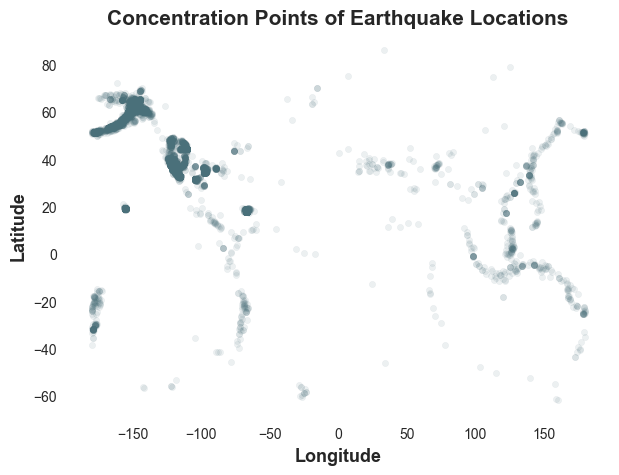

In [15]:
# Visualize Where There is a High Density of Data Points Using Alpha
eq.plot(kind="scatter", x="longitude", y="latitude", figsize = (7,5), color="#4A707A", alpha = 0.1)
plt.title("Concentration Points of Earthquake Locations", fontsize=15, fontweight="bold")
plt.ylabel("Latitude", fontsize=13, fontweight="bold")
plt.xlabel("Longitude", fontsize=13, fontweight="bold")
plt.gca().set_facecolor("none")  # Remove grid lines by changing the background color

---
### What was the relationship between the depth and magnitude of earthqakes?

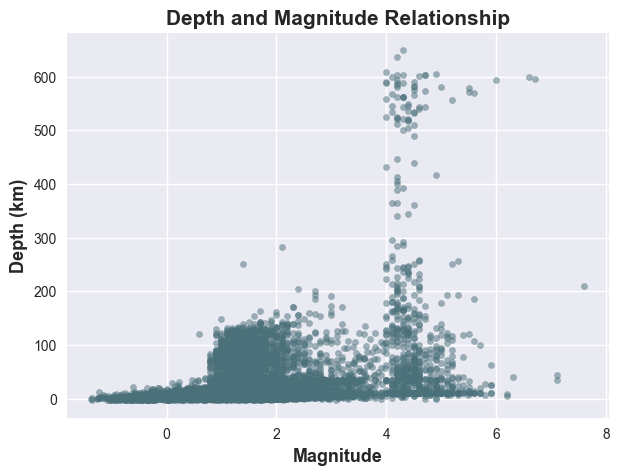

In [94]:
# Depth and Magnitude Relationship
eq.plot(kind="scatter", x="mag", y="depth", figsize=(7,5), alpha=0.5, color = "#4A707A")
plt.title("Depth and Magnitude Relationship", fontsize=15, fontweight="bold")
plt.xlabel("Magnitude", fontsize=13, fontweight="bold")
plt.ylabel("Depth (km)", fontsize=13, fontweight="bold")
plt.show()

- Earthquakes of up to magnitude 4 usually occur at depths between 0-200km.
- A high depth earthquake is likely to have a magnitude of 4-5.
- Earthquakes with a magnitude greater than 6 have scattered depths.

---
### What was the magnitute distribution of the earthquakes?

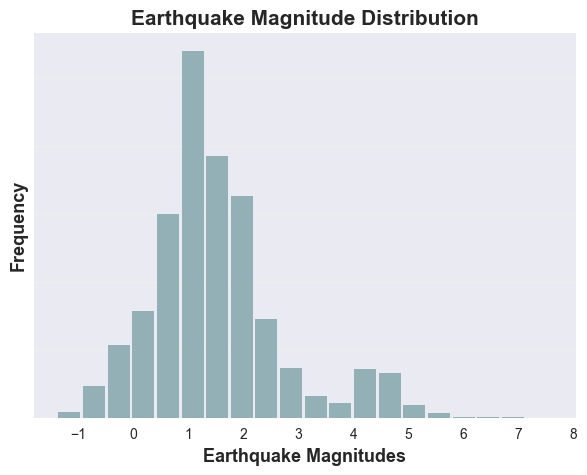

In [19]:
# Histogram of Earthquake Magnitude Distribution
histo = eq.mag.hist(figsize=(7,5), bins = 20, width = 0.4, color = "#94B0B7")
plt.title("Earthquake Magnitude Distribution", fontsize=15, fontweight="bold")
plt.xlabel("Earthquake Magnitudes", fontsize=13, fontweight="bold")
plt.ylabel("Frequency", fontsize=13, fontweight="bold")

plt.xticks(np.arange(-1,9,1))
plt.yticks(visible=False)

histo.yaxis.grid(color="#EEEEEE")  # to color the grid line
histo.xaxis.grid(False)    # to remove the grid line
histo.set_axisbelow(True)  # to make the grid line below the shape

# Histogram of Earthquake Magnitude Distribution with SEABORN
#sns.histplot(data=eq["mag"], binwidth=0.4, kde=True, color="teal")
#plt.title("Earthquake Magnitude Distribution", fontsize=18)
#plt.xlabel("Magnitude Scale", fontsize=16)
#plt.ylabel("Number of Earthquakes", fontsize=16)
#plt.gca().set_facecolor("none")  # Remove grid lines by changing the background color

- The earthquake magnitudes occurred especially in the range of 0-2.
- It is not wrong to have a negative value. Negative (-) values indicate normal, positive (+) values indicate reverse faulting mechanism.

---
### What was the mean magnitude of seismic activities?

In [119]:
# Count Types and Put into a Dataframe
eq_type = eq.groupby(["type"])["type"].count().to_frame("count").sort_values(ascending=False, by="count").reset_index()

# Adding Percentiles to the Table
eq_type_per = pd.concat([eq_type, pd.DataFrame((100*eq_type["count"]/sum(eq_type["count"])).round(2))], axis=1)
eq_type_per.columns = ["type", "count", "count (%)"]
eq_type_per.sort_values(ascending=False, by="count")

,type,count,count (%)
0,earthquake,11263,97.57
1,quarry blast,119,1.03
2,explosion,88,0.76
3,ice quake,71,0.62
4,other event,2,0.02
5,chemical explosion,1,0.01


Not all earthquakes are natural, and a small fraction of 2% are caused by humans.

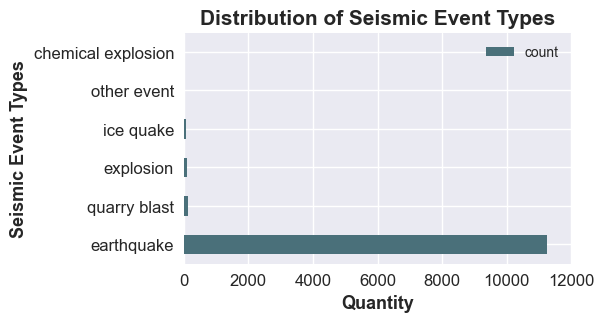

In [120]:
# Plot the Data
ax = eq_type.plot.barh(figsize = (5,3), y="count", x="type", color="#4A707A", xticks=np.arange(0,13000,2000), xlim=(0,12000))

# Set Titles
ax.set_title("Distribution of Seismic Event Types", fontsize=15, fontweight="bold")
ax.set_ylabel("Seismic Event Types", fontsize=13, fontweight="bold")
ax.set_xlabel("Quantity", fontsize=13, fontweight="bold")
ax.tick_params(axis="both", labelsize=12) # Size of parameters

---

### What was the mean magnitude of seismic activities?

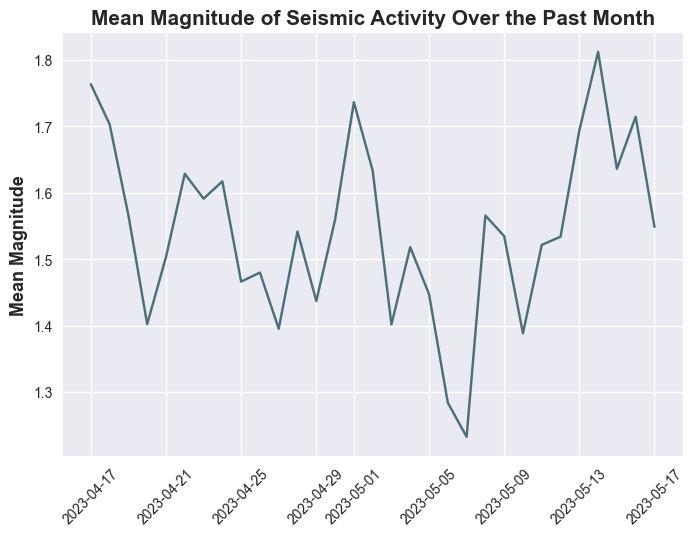

In [20]:
# Separate the Date (yy-mm-dd) and Time from the "time" Column into Their Own 
eq["time"] = pd.to_datetime(eq["time"])
eq["date"] = eq["time"].dt.date
eq["date"].unique()  # the data is on collected on a month of 31 days
eq["time"] = eq["time"].dt.time
eq["time"] = eq["time"].astype(str).str.split(".").str[0] 

# Getting a Dataframe of Each Day with the Mean of All Event During That Day
mag_mean = eq.groupby("date")["mag"].mean().reset_index()

# Plot the Data and Set Titles
plt.plot(mag_mean["date"], mag_mean["mag"], color="#4A707A")
plt.title("Mean Magnitude of Seismic Activity Over the Past Month", fontsize=15, fontweight="bold")
plt.ylabel("Mean Magnitude", fontsize=13, fontweight="bold")
plt.xticks(rotation=45)   #plt.ylim([0, max(mag_mean["mag"])])
plt.show()

---
### What was the Rate of Human-Reviewed Earthquakes?

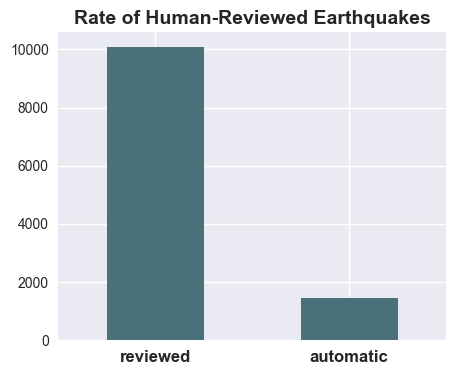

In [106]:
ax = pd.Series(eq["status"]).value_counts().plot(kind="bar", color="#4A707A", figsize=(5,4))
plt.title("Rate of Human-Reviewed Earthquakes", fontsize=14, fontweight="bold")
plt.xticks(rotation=0, fontsize=12, fontweight="bold")
plt.xlabel(None)
plt.show()

- The vast majority of earthquakes in our data have been reviewed by humans. 
- The minority of automated events are directly posted by automated processing systems and have not been verified or altered by a human.